In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg as LA
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Feature/advanced+statistical_feature.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [3]:
x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)

In [4]:
# feature scaling

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [5]:
# Applying LDA

lda  = LinearDiscriminantAnalysis(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [6]:
# fitting logistic regression on the training set
import xgboost as xgb
classifier = xgb.XGBClassifier( random_state=0)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

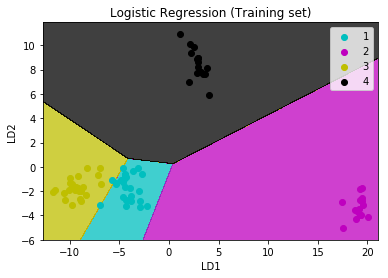

In [9]:
# Visualising the Training set results
colors=["c", "m", "y", "k"]
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap((colors)))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap((colors))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

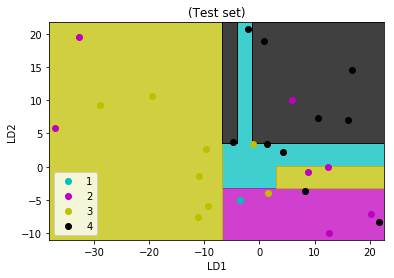

In [7]:
# visualising the test set results
colors=["c", "m", "y", "k"]
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap((colors)))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap((colors))(i), label = j)
plt.title('(Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from pandas import read_csv, DataFrame, concat, Series

In [61]:
data1 = read_csv('Feature/advanced+statistical_feature.csv')
x1 = data.drop("Level", 1)
y1 = data["Level"]

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
scaled_data = scaler.transform(data1)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [65]:
x_pca = pca.transform(scaled_data)

In [66]:
scaled_data.shape

(157, 121)

In [67]:
x_pca.shape

(157, 3)

Text(0, 0.5, 'Second Principal Component')

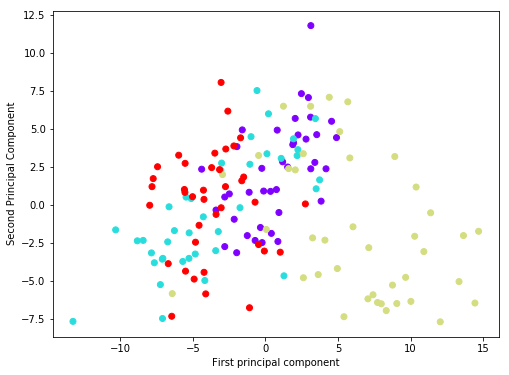

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Level'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

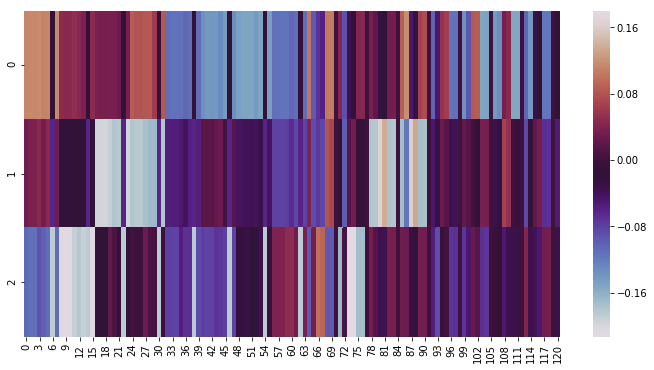

In [69]:
map= pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

In [70]:
from pandas import read_csv, DataFrame, concat, Series
from sklearn.decomposition import PCA
from IPython.display import display
from seaborn import kdeplot, distplot, set_style, despine, lmplot
from matplotlib.pyplot import figure, show, title, subplots
from itertools import combinations
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [71]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
pca.n_components_

120

In [73]:
#Explained Variance
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,121)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P111,P112,P113,P114,P115,P116,P117,P118,P119,P120
Explained Variance,5.862722e+65,2.539362e+65,1.951383e+65,1.109224e+65,9.623454e+64,6.330575e+64,4.169326e+64,1.320809e+64,7.916210e+33,3.166893e+33,...,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,2.401247e+31


In [74]:
#Explained Variance Ratio
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,121)], columns=["Explained Variance Ratio"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P111,P112,P113,P114,P115,P116,P117,P118,P119,P120
Explained Variance Ratio,0.43,0.19,0.14,0.08,0.07,0.05,0.03,0.01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Preview of PCA Transformed Data
components_applied = DataFrame(pca.transform(x))
components_applied.columns = ["P" + str(i) for i in range(1,121)]
components_applied.round(2).head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P111,P112,P113,P114,P115,P116,P117,P118,P119,P120
0,-2.832020e+32,2.470642e+32,-4.649257e+32,-2.997327e+32,-4.762754e+32,7.479826e+32,2.328500e+32,-2.722055e+31,-2.787624e+17,-2.741239e+16,...,-8.206816e+12,2127618.36,252760.81,-69004.99,395.24,-9.86,-14.26,5.49,0.0,-9.837760e+15
1,-4.079655e+32,1.883446e+32,-3.563151e+32,-7.444111e+31,-1.713230e+32,6.072041e+30,1.168398e+32,5.646327e+31,-2.788366e+17,2.532523e+16,...,-3.705213e+12,1700228.45,53163.26,-1764.05,-5.79,-2.92,4.16,-3.10,0.0,9.011915e+15
2,1.231512e+32,-1.797148e+32,-4.083588e+32,-5.991411e+31,-8.341955e+31,6.776527e+31,-9.768085e+30,-1.132070e+32,6.140726e+17,9.625217e+16,...,4.245955e+12,132505.99,-163926.51,29141.33,-305.49,16.92,3.25,-5.69,0.0,1.876944e+16
3,2.171691e+32,1.181532e+31,-5.775113e+32,-7.626065e+31,1.134824e+32,3.772899e+32,-1.857033e+31,-1.883515e+32,7.816769e+17,2.032693e+16,...,6.199937e+12,435564.74,-247702.38,14077.22,-570.00,32.96,4.56,-7.93,0.0,2.898090e+16
4,-1.936808e+32,8.126621e+28,-1.954844e+32,-2.633464e+32,-4.141089e+32,-3.360767e+31,5.163193e+31,8.710454e+30,3.446775e+16,1.284880e+17,...,-4.125140e+12,769997.96,129437.65,-10156.01,340.27,-12.97,-5.81,0.59,0.0,-3.232077e+15


In [76]:
#Pearson Correlations of Components with Glass Features
for p in components_applied.columns:
    new_df = x.copy()
    new_df[p] = components_applied[p]
    display(DataFrame(new_df.corr().round(2)[p]).drop(p,0).T)

,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P1,-0.48,-0.49,-0.48,-0.5,-0.47,-0.48,0.07,-0.49,-0.18,-0.17,...,0.71,0.7,NaN,0.38,0.7,0.13,0.09,0.42,0.42,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P2,-0.21,-0.19,-0.19,-0.15,-0.2,-0.15,-0.39,-0.21,-0.35,-0.36,...,0.04,0.02,NaN,-0.11,-0.05,0.11,0.11,-0.03,-0.04,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P3,0.66,0.67,0.67,0.66,0.65,0.64,0.2,0.66,0.68,0.69,...,-0.11,-0.13,NaN,-0.31,-0.06,0.06,0.12,-0.28,-0.29,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P4,0.3,0.3,0.3,0.32,0.31,0.26,-0.18,0.31,-0.56,-0.56,...,-0.26,-0.26,NaN,-0.2,-0.08,-0.14,-0.11,-0.26,-0.26,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P5,0.39,0.38,0.38,0.37,0.38,0.32,0.04,0.39,-0.16,-0.15,...,0.26,0.28,NaN,0.26,0.21,-0.1,-0.14,0.19,0.19,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P6,0.15,0.13,0.13,0.13,0.13,0.1,0.03,0.14,-0.14,-0.14,...,-0.04,-0.04,NaN,0.03,0.02,-0.02,-0.03,-0.0,0.0,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P7,0.13,0.13,0.13,0.13,0.13,0.12,0.03,0.13,-0.11,-0.1,...,0.08,0.06,NaN,0.01,-0.06,0.04,0.0,0.05,0.05,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P8,0.01,0.0,0.0,-0.0,0.0,-0.01,0.01,0.0,0.03,0.02,...,-0.05,-0.05,NaN,0.3,0.05,0.06,0.02,0.27,0.28,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P9,-0.03,-0.02,-0.02,-0.03,-0.03,-0.01,0.07,-0.03,0.11,0.11,...,0.1,0.1,NaN,-0.24,-0.04,-0.05,-0.02,-0.2,-0.21,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P10,-0.88,-0.87,-0.87,-0.88,-0.86,-0.8,0.05,-0.88,-0.08,-0.08,...,0.47,0.47,NaN,0.32,0.44,0.13,0.1,0.38,0.38,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P11,0.66,0.67,0.67,0.66,0.64,0.65,0.11,0.67,0.57,0.56,...,-0.69,-0.7,NaN,-0.52,-0.64,-0.09,-0.01,-0.55,-0.55,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P12,-0.13,-0.11,-0.1,-0.09,-0.11,-0.09,-0.16,-0.13,0.02,0.02,...,0.27,0.25,NaN,-0.09,0.27,0.15,0.18,-0.01,-0.01,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P13,-0.54,-0.53,-0.53,-0.53,-0.53,-0.47,-0.06,-0.54,0.03,0.02,...,0.19,0.19,NaN,0.25,0.07,0.07,0.03,0.29,0.29,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P14,-0.06,-0.06,-0.06,-0.03,-0.06,-0.04,-0.18,-0.06,-0.56,-0.56,...,-0.24,-0.25,NaN,-0.08,-0.3,-0.0,-0.03,-0.04,-0.05,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P15,-0.27,-0.27,-0.28,-0.26,-0.27,-0.24,-0.17,-0.26,-0.28,-0.29,...,-0.43,-0.42,NaN,-0.06,-0.43,-0.12,-0.12,-0.1,-0.1,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P16,0.52,0.52,0.52,0.52,0.52,0.47,0.04,0.52,-0.02,-0.01,...,-0.09,-0.11,NaN,-0.22,0.01,-0.0,0.03,-0.22,-0.22,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P17,0.37,0.38,0.38,0.37,0.36,0.37,0.18,0.37,0.69,0.7,...,0.06,0.03,NaN,-0.19,0.03,0.14,0.18,-0.12,-0.13,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P18,0.27,0.26,0.26,0.24,0.26,0.21,0.15,0.28,-0.16,-0.15,...,-0.3,-0.26,NaN,0.01,-0.12,-0.24,-0.23,-0.14,-0.12,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P19,-0.58,-0.58,-0.58,-0.59,-0.56,-0.56,0.07,-0.58,-0.17,-0.17,...,0.48,0.48,NaN,0.31,0.55,0.08,0.05,0.31,0.32,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P20,0.27,0.26,0.26,0.28,0.26,0.26,-0.18,0.28,-0.15,-0.16,...,-0.67,-0.65,NaN,-0.3,-0.65,-0.16,-0.14,-0.35,-0.35,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P21,0.13,0.14,0.15,0.15,0.15,0.13,0.02,0.12,0.16,0.16,...,0.17,0.15,NaN,-0.13,0.23,0.07,0.1,-0.08,-0.09,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P22,-0.23,-0.23,-0.23,-0.23,-0.24,-0.21,-0.02,-0.24,0.16,0.16,...,0.34,0.34,NaN,0.21,0.21,0.11,0.08,0.25,0.25,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P23,0.53,0.54,0.54,0.54,0.52,0.52,0.05,0.53,0.37,0.37,...,-0.34,-0.35,NaN,-0.38,-0.27,0.03,0.09,-0.36,-0.37,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P24,0.19,0.2,0.2,0.2,0.2,0.18,0.0,0.18,0.07,0.08,...,0.16,0.13,NaN,-0.15,0.25,0.1,0.13,-0.1,-0.11,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P25,0.68,0.69,0.69,0.69,0.67,0.65,0.09,0.69,0.46,0.46,...,-0.46,-0.48,NaN,-0.37,-0.37,-0.02,0.05,-0.38,-0.39,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P26,-0.59,-0.57,-0.57,-0.54,-0.56,-0.52,-0.29,-0.59,-0.35,-0.36,...,0.38,0.36,NaN,0.09,0.33,0.17,0.16,0.18,0.18,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P27,0.22,0.21,0.2,0.2,0.21,0.2,0.01,0.22,0.06,0.05,...,-0.56,-0.54,NaN,-0.17,-0.55,-0.17,-0.15,-0.24,-0.24,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P28,-0.21,-0.22,-0.22,-0.22,-0.21,-0.2,0.01,-0.2,-0.04,-0.05,...,-0.22,-0.2,NaN,0.1,-0.29,-0.1,-0.13,0.06,0.06,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P29,0.11,0.11,0.11,0.14,0.11,0.12,-0.23,0.11,-0.17,-0.18,...,-0.23,-0.22,NaN,-0.04,-0.35,-0.06,-0.08,-0.05,-0.05,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P30,-0.02,-0.01,-0.01,-0.04,-0.02,-0.01,0.27,-0.03,0.55,0.56,...,0.32,0.3,NaN,0.05,0.33,0.16,0.17,0.11,0.11,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P31,-0.49,-0.5,-0.5,-0.5,-0.48,-0.5,-0.01,-0.5,-0.45,-0.44,...,0.65,0.64,NaN,0.39,0.67,0.08,0.03,0.41,0.41,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P32,-0.28,-0.3,-0.3,-0.31,-0.29,-0.3,0.08,-0.28,-0.11,-0.11,...,0.24,0.26,NaN,0.32,0.14,-0.03,-0.09,0.29,0.3,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P33,-0.28,-0.28,-0.27,-0.25,-0.27,-0.27,-0.22,-0.29,-0.53,-0.52,...,0.52,0.51,NaN,0.23,0.48,0.09,0.06,0.27,0.27,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P34,-0.16,-0.16,-0.16,-0.19,-0.15,-0.17,0.21,-0.16,0.06,0.07,...,0.15,0.14,NaN,0.06,0.31,0.03,0.04,0.05,0.06,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P35,0.28,0.28,0.28,0.31,0.27,0.29,-0.23,0.28,-0.02,-0.03,...,-0.53,-0.53,NaN,-0.3,-0.56,-0.07,-0.04,-0.31,-0.32,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P36,0.31,0.3,0.3,0.28,0.3,0.26,0.16,0.32,0.02,0.02,...,-0.49,-0.47,NaN,-0.2,-0.33,-0.18,-0.14,-0.28,-0.28,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P37,0.44,0.42,0.42,0.41,0.42,0.39,0.11,0.44,0.17,0.16,...,-0.5,-0.48,NaN,-0.16,-0.48,-0.19,-0.17,-0.25,-0.25,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P38,0.55,0.54,0.54,0.54,0.53,0.52,0.06,0.55,0.35,0.34,...,-0.62,-0.61,NaN,-0.31,-0.63,-0.14,-0.1,-0.36,-0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P39,-0.66,-0.67,-0.66,-0.67,-0.65,-0.64,0.03,-0.67,-0.24,-0.24,...,0.78,0.79,NaN,0.53,0.68,0.12,0.04,0.57,0.57,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P40,0.02,0.02,0.02,0.06,0.02,0.03,-0.33,0.03,-0.5,-0.51,...,-0.54,-0.54,NaN,-0.26,-0.52,-0.13,-0.11,-0.29,-0.29,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P41,-0.01,0.0,0.0,0.05,-0.0,0.03,-0.39,-0.0,-0.48,-0.49,...,-0.4,-0.41,NaN,-0.28,-0.46,-0.02,-0.02,-0.25,-0.25,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P42,-0.5,-0.52,-0.52,-0.54,-0.49,-0.52,0.15,-0.5,-0.27,-0.27,...,0.59,0.61,NaN,0.52,0.61,-0.01,-0.07,0.48,0.48,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P43,0.33,0.32,0.32,0.32,0.32,0.31,-0.0,0.34,0.1,0.1,...,-0.49,-0.47,NaN,-0.12,-0.51,-0.15,-0.14,-0.19,-0.19,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P44,0.5,0.49,0.49,0.48,0.48,0.47,0.08,0.5,0.31,0.3,...,-0.6,-0.58,NaN,-0.25,-0.59,-0.16,-0.13,-0.32,-0.31,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P45,-0.64,-0.63,-0.62,-0.6,-0.62,-0.57,-0.22,-0.65,-0.35,-0.35,...,0.55,0.53,NaN,0.22,0.44,0.17,0.13,0.32,0.31,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P46,0.17,0.19,0.19,0.21,0.19,0.2,-0.08,0.17,0.21,0.2,...,0.09,0.08,NaN,-0.15,0.15,0.07,0.11,-0.12,-0.12,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P47,-0.13,-0.16,-0.16,-0.19,-0.14,-0.2,0.27,-0.14,-0.12,-0.11,...,0.38,0.4,NaN,0.42,0.47,-0.04,-0.09,0.35,0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P48,-0.09,-0.1,-0.11,-0.09,-0.11,-0.09,-0.13,-0.09,-0.15,-0.16,...,-0.34,-0.33,NaN,0.04,-0.41,-0.06,-0.09,0.02,0.02,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P49,0.65,0.65,0.65,0.64,0.63,0.62,0.11,0.66,0.42,0.42,...,-0.68,-0.67,NaN,-0.35,-0.63,-0.14,-0.09,-0.41,-0.41,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P50,0.52,0.52,0.52,0.52,0.51,0.51,0.01,0.53,0.32,0.31,...,-0.61,-0.6,NaN,-0.3,-0.63,-0.12,-0.08,-0.35,-0.35,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P51,-0.47,-0.48,-0.48,-0.46,-0.47,-0.46,-0.28,-0.47,-0.76,-0.76,...,0.02,0.04,NaN,0.25,-0.04,-0.06,-0.12,0.23,0.23,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P52,-0.59,-0.6,-0.6,-0.61,-0.58,-0.6,-0.01,-0.6,-0.4,-0.39,...,0.61,0.61,NaN,0.53,0.65,0.1,0.03,0.54,0.54,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P53,0.59,0.6,0.6,0.57,0.58,0.56,0.29,0.6,0.62,0.62,...,-0.2,-0.21,NaN,-0.38,-0.12,-0.06,0.02,-0.4,-0.4,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P54,0.27,0.29,0.29,0.31,0.27,0.32,-0.14,0.27,0.36,0.35,...,-0.42,-0.45,NaN,-0.39,-0.46,0.09,0.14,-0.33,-0.34,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P55,-0.47,-0.48,-0.47,-0.49,-0.45,-0.49,0.06,-0.47,-0.38,-0.37,...,0.63,0.64,NaN,0.46,0.69,0.05,-0.0,0.45,0.45,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P56,-0.53,-0.54,-0.54,-0.52,-0.52,-0.53,-0.29,-0.53,-0.9,-0.9,...,0.21,0.22,NaN,0.34,0.18,-0.05,-0.12,0.32,0.32,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P57,0.37,0.39,0.39,0.39,0.36,0.41,0.05,0.38,0.61,0.61,...,-0.41,-0.43,NaN,-0.5,-0.52,0.03,0.09,-0.43,-0.44,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P58,-0.54,-0.54,-0.53,-0.53,-0.52,-0.51,-0.1,-0.55,-0.34,-0.33,...,0.68,0.67,NaN,0.36,0.64,0.16,0.11,0.42,0.42,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P59,0.21,0.22,0.21,0.22,0.2,0.23,-0.03,0.22,0.34,0.33,...,-0.49,-0.5,NaN,-0.27,-0.59,-0.02,0.0,-0.25,-0.26,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P60,-0.06,-0.06,-0.06,-0.04,-0.05,-0.07,-0.13,-0.07,-0.35,-0.34,...,0.43,0.43,NaN,0.13,0.49,0.06,0.05,0.14,0.14,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P61,-0.44,-0.43,-0.42,-0.44,-0.42,-0.4,0.13,-0.44,0.17,0.18,...,0.67,0.65,NaN,0.28,0.59,0.2,0.17,0.36,0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P62,-0.35,-0.34,-0.34,-0.32,-0.33,-0.32,-0.15,-0.35,-0.27,-0.27,...,0.5,0.49,NaN,0.22,0.51,0.12,0.1,0.26,0.26,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P63,-0.62,-0.62,-0.62,-0.61,-0.6,-0.6,-0.13,-0.62,-0.63,-0.62,...,0.6,0.59,NaN,0.37,0.59,0.09,0.03,0.41,0.41,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P64,0.48,0.47,0.47,0.45,0.46,0.46,0.19,0.48,0.48,0.48,...,-0.53,-0.53,NaN,-0.28,-0.56,-0.1,-0.07,-0.31,-0.31,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P65,0.25,0.26,0.25,0.27,0.24,0.27,-0.11,0.26,0.07,0.06,...,-0.65,-0.65,NaN,-0.35,-0.69,-0.1,-0.07,-0.36,-0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P66,0.5,0.5,0.5,0.48,0.49,0.48,0.15,0.51,0.37,0.36,...,-0.64,-0.64,NaN,-0.31,-0.59,-0.14,-0.1,-0.37,-0.37,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P67,0.43,0.43,0.43,0.44,0.41,0.43,-0.07,0.43,0.24,0.23,...,-0.67,-0.67,NaN,-0.36,-0.68,-0.1,-0.06,-0.38,-0.38,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P68,0.45,0.44,0.44,0.44,0.43,0.43,0.0,0.45,0.24,0.23,...,-0.69,-0.69,NaN,-0.35,-0.69,-0.13,-0.1,-0.4,-0.4,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P69,0.55,0.55,0.55,0.56,0.53,0.54,-0.03,0.55,0.32,0.31,...,-0.68,-0.68,NaN,-0.4,-0.7,-0.09,-0.05,-0.42,-0.42,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P70,-0.29,-0.29,-0.28,-0.29,-0.29,-0.27,0.04,-0.3,0.06,0.07,...,0.63,0.61,NaN,0.23,0.56,0.19,0.17,0.31,0.31,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P71,0.58,0.58,0.58,0.59,0.56,0.57,-0.05,0.58,0.33,0.32,...,-0.67,-0.66,NaN,-0.42,-0.66,-0.1,-0.05,-0.45,-0.45,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P72,-0.51,-0.51,-0.51,-0.5,-0.49,-0.5,-0.1,-0.52,-0.53,-0.52,...,0.54,0.54,NaN,0.28,0.6,0.06,0.03,0.3,0.3,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P73,0.54,0.54,0.54,0.54,0.53,0.53,0.02,0.55,0.34,0.33,...,-0.69,-0.67,NaN,-0.35,-0.65,-0.14,-0.09,-0.4,-0.4,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P74,0.28,0.28,0.28,0.3,0.27,0.3,-0.09,0.29,0.23,0.22,...,-0.68,-0.68,NaN,-0.39,-0.71,-0.09,-0.04,-0.4,-0.4,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P75,-0.46,-0.45,-0.45,-0.44,-0.44,-0.43,-0.06,-0.46,-0.26,-0.25,...,0.65,0.63,NaN,0.29,0.64,0.16,0.12,0.35,0.35,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P76,-0.04,-0.03,-0.02,-0.01,-0.03,-0.02,-0.09,-0.05,-0.0,0.0,...,0.42,0.4,NaN,0.06,0.41,0.15,0.15,0.13,0.12,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P77,0.34,0.35,0.34,0.35,0.33,0.36,-0.03,0.35,0.36,0.35,...,-0.65,-0.65,NaN,-0.37,-0.69,-0.07,-0.03,-0.37,-0.38,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P78,0.45,0.44,0.44,0.44,0.43,0.42,0.03,0.46,0.15,0.14,...,-0.66,-0.65,NaN,-0.29,-0.64,-0.17,-0.14,-0.36,-0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P79,0.32,0.33,0.33,0.35,0.31,0.35,-0.15,0.32,0.28,0.27,...,-0.47,-0.49,NaN,-0.39,-0.56,0.02,0.06,-0.35,-0.35,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P80,-0.27,-0.27,-0.27,-0.27,-0.26,-0.28,0.03,-0.28,-0.15,-0.14,...,0.61,0.6,NaN,0.28,0.65,0.13,0.11,0.32,0.32,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P81,0.38,0.39,0.39,0.42,0.37,0.4,-0.24,0.38,0.06,0.05,...,-0.6,-0.61,NaN,-0.45,-0.62,-0.02,0.03,-0.43,-0.43,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P82,-0.12,-0.14,-0.14,-0.15,-0.12,-0.18,0.1,-0.12,-0.42,-0.41,...,0.4,0.41,NaN,0.32,0.52,-0.07,-0.1,0.25,0.26,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P83,-0.32,-0.31,-0.31,-0.32,-0.31,-0.31,0.01,-0.33,-0.12,-0.12,...,0.58,0.56,NaN,0.23,0.61,0.14,0.13,0.28,0.28,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P84,0.3,0.32,0.32,0.34,0.3,0.34,-0.17,0.3,0.24,0.24,...,-0.35,-0.36,NaN,-0.32,-0.46,0.04,0.07,-0.27,-0.27,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P85,-0.46,-0.45,-0.45,-0.45,-0.44,-0.43,-0.05,-0.47,-0.17,-0.16,...,0.57,0.56,NaN,0.25,0.6,0.16,0.14,0.31,0.3,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P86,-0.62,-0.61,-0.61,-0.6,-0.6,-0.58,-0.09,-0.62,-0.34,-0.33,...,0.62,0.6,NaN,0.29,0.59,0.17,0.13,0.37,0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P87,0.14,0.14,0.13,0.15,0.13,0.16,-0.11,0.14,0.09,0.08,...,-0.6,-0.6,NaN,-0.27,-0.66,-0.08,-0.07,-0.28,-0.28,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P88,0.34,0.35,0.35,0.36,0.33,0.37,-0.07,0.34,0.4,0.39,...,-0.59,-0.6,NaN,-0.37,-0.66,-0.01,0.02,-0.35,-0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P89,-0.34,-0.34,-0.34,-0.32,-0.33,-0.34,-0.19,-0.35,-0.52,-0.51,...,0.52,0.52,NaN,0.26,0.55,0.08,0.05,0.29,0.29,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P90,-0.04,-0.05,-0.05,-0.09,-0.04,-0.1,0.28,-0.04,-0.11,-0.09,...,0.39,0.4,NaN,0.32,0.48,-0.03,-0.06,0.27,0.28,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P91,-0.06,-0.05,-0.05,-0.03,-0.05,-0.04,-0.13,-0.07,-0.1,-0.1,...,0.29,0.28,NaN,-0.02,0.36,0.1,0.12,0.02,0.02,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P92,0.39,0.39,0.39,0.39,0.38,0.38,-0.01,0.4,0.17,0.16,...,-0.71,-0.7,NaN,-0.32,-0.67,-0.15,-0.11,-0.38,-0.38,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P93,0.33,0.33,0.33,0.34,0.31,0.32,-0.03,0.33,0.24,0.24,...,-0.17,-0.18,NaN,-0.18,-0.25,0.0,0.02,-0.17,-0.17,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P94,-0.48,-0.48,-0.47,-0.48,-0.46,-0.47,-0.01,-0.48,-0.35,-0.34,...,0.64,0.63,NaN,0.34,0.66,0.1,0.06,0.37,0.37,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P95,0.62,0.63,0.63,0.64,0.61,0.62,-0.03,0.63,0.37,0.36,...,-0.7,-0.69,NaN,-0.49,-0.67,-0.11,-0.04,-0.52,-0.52,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P96,-0.35,-0.35,-0.35,-0.37,-0.34,-0.36,0.17,-0.35,-0.03,-0.02,...,0.73,0.73,NaN,0.42,0.71,0.1,0.06,0.44,0.44,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P97,-0.47,-0.49,-0.49,-0.48,-0.46,-0.48,-0.13,-0.47,-0.72,-0.71,...,0.26,0.28,NaN,0.31,0.21,-0.1,-0.16,0.27,0.28,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P98,0.49,0.5,0.5,0.5,0.47,0.5,0.06,0.49,0.58,0.58,...,-0.43,-0.44,NaN,-0.31,-0.49,0.02,0.06,-0.29,-0.3,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P99,-0.49,-0.5,-0.5,-0.49,-0.48,-0.49,-0.12,-0.49,-0.64,-0.64,...,0.15,0.16,NaN,0.23,0.25,-0.05,-0.08,0.2,0.2,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P100,0.15,0.13,0.13,0.09,0.14,0.07,0.35,0.15,0.19,0.2,...,0.43,0.45,NaN,0.38,0.47,-0.05,-0.09,0.31,0.31,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P101,-0.29,-0.28,-0.28,-0.25,-0.27,-0.25,-0.25,-0.3,-0.29,-0.29,...,0.42,0.4,NaN,0.1,0.35,0.16,0.14,0.19,0.18,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P102,-0.47,-0.49,-0.49,-0.51,-0.47,-0.49,0.18,-0.48,-0.12,-0.11,...,0.72,0.74,NaN,0.56,0.68,0.05,-0.02,0.55,0.55,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P103,-0.38,-0.4,-0.4,-0.44,-0.38,-0.4,0.3,-0.38,0.12,0.13,...,0.34,0.36,NaN,0.38,0.38,0.02,-0.02,0.36,0.36,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P104,0.54,0.54,0.54,0.52,0.52,0.53,0.22,0.54,0.72,0.72,...,-0.46,-0.47,NaN,-0.33,-0.47,-0.01,0.04,-0.33,-0.33,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P105,-0.03,-0.02,-0.02,0.02,-0.03,0.0,-0.38,-0.03,-0.41,-0.42,...,-0.12,-0.13,NaN,-0.17,-0.19,0.03,0.03,-0.12,-0.13,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P106,0.16,0.18,0.17,0.21,0.16,0.2,-0.28,0.17,-0.09,-0.1,...,-0.67,-0.68,NaN,-0.45,-0.67,-0.04,0.0,-0.43,-0.43,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P107,0.13,0.14,0.14,0.11,0.12,0.13,0.3,0.13,0.66,0.67,...,0.16,0.15,NaN,-0.0,0.2,0.14,0.16,0.04,0.03,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P108,0.53,0.54,0.54,0.56,0.52,0.54,-0.09,0.54,0.31,0.3,...,-0.72,-0.73,NaN,-0.51,-0.71,-0.06,0.01,-0.51,-0.52,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P109,-0.1,-0.1,-0.11,-0.06,-0.1,-0.08,-0.36,-0.1,-0.59,-0.6,...,-0.51,-0.51,NaN,-0.23,-0.48,-0.12,-0.1,-0.25,-0.25,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P110,-0.51,-0.52,-0.52,-0.51,-0.49,-0.51,-0.12,-0.52,-0.66,-0.66,...,0.43,0.44,NaN,0.33,0.46,-0.02,-0.06,0.31,0.32,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P111,-0.53,-0.54,-0.54,-0.55,-0.52,-0.54,0.01,-0.54,-0.43,-0.42,...,0.71,0.72,NaN,0.45,0.68,0.06,-0.01,0.47,0.47,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P112,0.15,0.15,0.15,0.18,0.14,0.17,-0.29,0.15,-0.25,-0.27,...,-0.62,-0.62,NaN,-0.32,-0.64,-0.1,-0.08,-0.34,-0.34,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P113,0.59,0.61,0.61,0.61,0.58,0.6,0.05,0.6,0.58,0.58,...,-0.6,-0.62,NaN,-0.51,-0.6,0.0,0.07,-0.49,-0.5,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P114,-0.53,-0.54,-0.54,-0.54,-0.51,-0.53,-0.05,-0.53,-0.57,-0.56,...,0.36,0.38,NaN,0.35,0.41,-0.04,-0.09,0.32,0.33,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P115,0.61,0.61,0.61,0.59,0.59,0.59,0.24,0.61,0.8,0.79,...,-0.44,-0.45,NaN,-0.34,-0.48,-0.02,0.03,-0.34,-0.34,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P116,-0.56,-0.57,-0.57,-0.57,-0.55,-0.57,-0.08,-0.57,-0.63,-0.63,...,0.63,0.65,NaN,0.5,0.57,0.0,-0.08,0.49,0.5,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P117,-0.39,-0.39,-0.39,-0.35,-0.37,-0.37,-0.37,-0.39,-0.87,-0.88,...,0.11,0.12,NaN,0.13,0.13,-0.06,-0.09,0.11,0.11,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P118,0.74,0.74,0.74,0.71,0.72,0.7,0.26,0.74,0.71,0.71,...,-0.51,-0.51,NaN,-0.33,-0.44,-0.07,-0.01,-0.37,-0.37,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,StdDeviagammaLow,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid
P120,0.14,0.15,0.15,0.17,0.16,0.15,-0.13,0.13,-0.0,-0.0,...,-0.0,-0.01,NaN,-0.31,-0.15,-0.04,-0.01,-0.26,-0.26,NaN


IndexError: index 2 is out of bounds for axis 0 with size 2

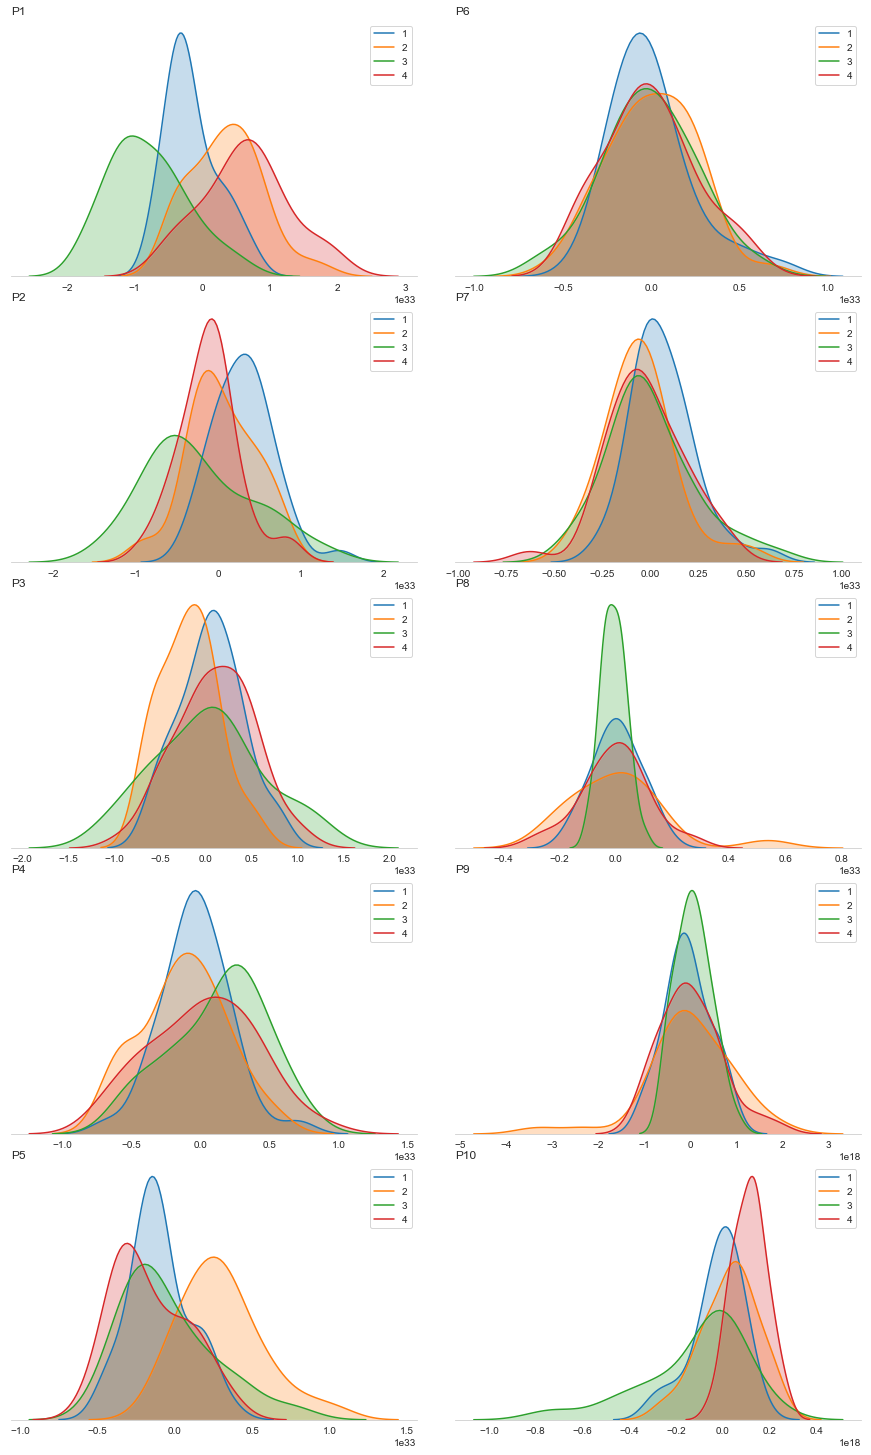

In [77]:
#Distribution Plots of Each Component by Glass Type
set_style("whitegrid")
set_style({"axes.grid":False})

for_plotting = components_applied.copy()
for_plotting["Type"] = y

n = 10
fig, axes = subplots(int(10/2),2, figsize=(12.5,20))
fig.tight_layout()
i = 0
j = 0


for p in components_applied.columns:
    
    for t in for_plotting["Type"].unique():
        data_by_type = for_plotting[for_plotting["Type"] == t]
        kdeplot(Series(data_by_type[p], name = t), shade=True, ax=axes[i][j])
        #distplot(Series(data_by_type[p], name = t), kde=False, ax=axes[i][j])
        axes[i][j].set_title(p, loc="left")
        axes[i][j].set_xlabel("",visible=False)
        axes[i][j].set_yticklabels([],visible=False)
        despine(left=True)
    i += 1
    
    if(i == n/2):
        i = 0
        j += 1
    
show()

In [78]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences
l = pd.read_csv('Feature/advanced+statistical_feature.csv').sample(frac = .25) #read the dataset and sample 25% of it

In [79]:
#Data Wrangling
l.replace([np.inf, -np.inf], np.nan) #convert infs to nans
l = l.dropna(axis = 1, how = 'any') #remove nans
l = l.drop("Level",axis=1)
l = l._get_numeric_data() #keep only numeric features

In [80]:
#Standardize
x = l.values #convert the data into a numpy array
x = scale(x)

In [83]:
covar_matrix = PCA(n_components = 39)

In [84]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([28.9, 47.6, 61.6, 68.6, 74.1, 78.8, 82.2, 85. , 87. , 88.9, 90.6,
       92. , 93.3, 94.2, 95. , 95.7, 96.3, 96.9, 97.4, 97.8, 98.1, 98.4,
       98.7, 98.9, 99.1, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

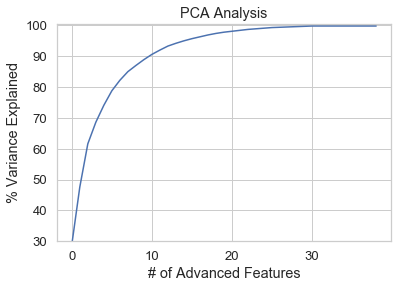

In [86]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Advanced Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [87]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output

Using TensorFlow backend.


In [88]:
data12 = pd.read_csv('Feature/advanced+statistical_feature.csv')

In [96]:
data12.head()

,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid,Level
0,4.300000e+16,3.780000e+16,1.890000e+16,5.430000e+12,1.730000e+14,1.470000e+14,2.457627,7.020000e+31,3.500000e+17,2.990000e+17,...,2181226.244,1,289491.1356,4153.0,7.681071,58.999222,2179685.673,2180437.760,1,1
1,1.350000e+17,1.110000e+17,5.550000e+16,1.590000e+13,5.520000e+14,3.880000e+14,2.457627,2.200000e+32,3.950000e+17,3.150000e+17,...,3782084.274,1,577820.3051,3042.0,5.285282,26.848516,3060695.372,3089167.403,1,1
2,7.950000e+16,7.060000e+16,3.530000e+16,1.010000e+13,3.170000e+14,2.810000e+14,2.457627,1.420000e+32,3.940000e+17,3.320000e+17,...,6169502.272,1,291403.8136,5399.0,7.681019,58.998682,2180037.296,2181038.030,1,1
3,8.040000e+16,7.090000e+16,3.540000e+16,1.020000e+13,3.240000e+14,2.770000e+14,2.457627,1.430000e+32,2.630000e+17,2.320000e+17,...,6898355.875,1,292725.5085,6579.0,7.680904,58.997476,2179888.992,2181069.300,1,1
4,4.530000e+16,3.930000e+16,1.970000e+16,5.650000e+12,1.820000e+14,1.510000e+14,2.457627,7.300000e+31,5.340000e+17,4.150000e+17,...,3779434.127,1,293125.3898,6583.0,7.680887,58.997303,2181088.932,2182301.945,1,1


In [97]:
X12 = data12.loc["EnergyDCTDelta":"EnergygammaMid",:]
y12 = data12.Level



In [98]:
data12.shape

(157, 121)

In [112]:
pca = PCA(1)
X_pca = pca.fit_transform(data)

In [113]:
pca.components_.shape

(1, 121)

In [114]:
pca.explained_variance_ratio_

array([0.43085732])

In [115]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000])

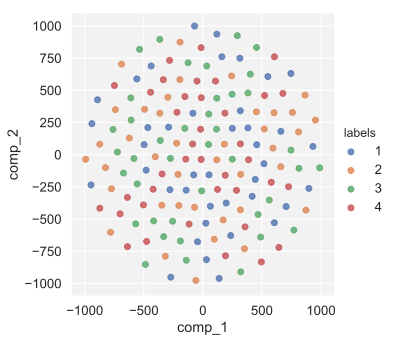

In [116]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(157) ,fit_reg=False)